In [3]:
#Habilitar intellisense
%config IPCompleter.greedy = True

In [4]:
%matplotlib inline

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Práctica

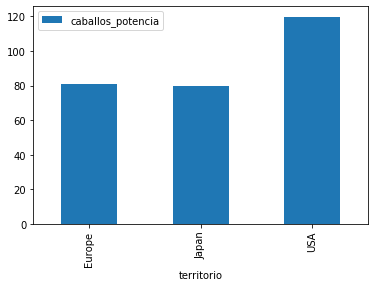

In [23]:
cars = pd.read_csv(os.path.join(".", "datos_automoviles.csv"))

# Hay alguna relacion entre el territorio y los caballos de potencia?
por_territorio = cars.groupby("territorio")
por_territorio.agg({'caballos_potencia':'mean'}).plot.bar()

In [36]:
# Correlación entre caballos de fuerza y millas por galón
cars_corr = cars.corr()
cars_corr

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento
cilindros,1.000000,0.895220,-0.360762,-0.522452,-0.775396,0.844158,0.951787
peso,0.895220,1.000000,-0.315389,-0.430086,-0.831741,0.866586,0.932475
anio,-0.360762,-0.315389,1.000000,0.301992,0.579267,-0.424419,-0.381714
aceleracion,-0.522452,-0.430086,0.301992,1.000000,0.420289,-0.697124,-0.557984
mpg,-0.775396,-0.831741,0.579267,0.420289,1.000000,-0.778427,-0.804203
caballos_potencia,0.844158,0.866586,-0.424419,-0.697124,-0.778427,1.000000,0.898326
desplazamiento,0.951787,0.932475,-0.381714,-0.557984,-0.804203,0.898326,1.000000


In [37]:
print("—————Correlación entre caballos_pretencia y mpg—————")
print(cars_corr["caballos_potencia"]["mpg"])


—————Correlación entre caballos_pretencia y mpg—————
-0.7784267838977751


—————Dirección de las variables—————


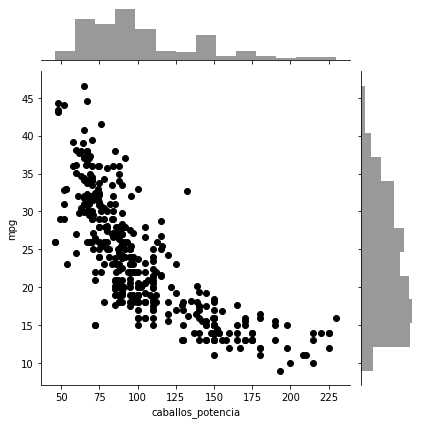

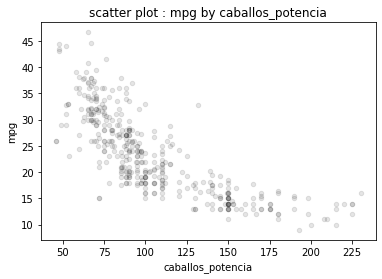

In [28]:
# Dirección de las variables
print("—————Dirección de las variables—————")
sns.jointplot(x='caballos_potencia', y='mpg', data=cars, color='#000000')
cars.plot.scatter(x='caballos_potencia', y='mpg', color='#000000', title='scatter plot : mpg by caballos_potencia', alpha=0.1)